In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
data = pd.read_csv(r"C:\Users\sruja\Downloads\data.csv")

In [17]:
data

,country,country_code,year_week,level,region,region_name,new_cases,tests_done,population,testing_rate,positivity_rate,testing_data_source
0,Austria,AT,2020-W01,national,AT,Austria,NaN,NaN,8978929,NaN,NaN,NaN
1,Austria,AT,2020-W02,national,AT,Austria,NaN,NaN,8978929,NaN,NaN,NaN
2,Austria,AT,2020-W03,national,AT,Austria,NaN,NaN,8978929,NaN,NaN,NaN
3,Austria,AT,2020-W04,national,AT,Austria,NaN,NaN,8978929,NaN,NaN,NaN
4,Austria,AT,2020-W05,national,AT,Austria,NaN,NaN,8978929,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
6115,Sweden,SE,2023-W43,national,SE,Sweden,1992.0,7317.0,10452326,70.003557,27.224272,TESSy COVID-19
6116,Sweden,SE,2023-W44,national,SE,Sweden,2730.0,8819.0,10452326,84.373564,30.955891,TESSy COVID-19
6117,Sweden,SE,2023-W45,national,SE,Sweden,3523.0,10180.0,10452326,97.394589,34.607073,TESSy COVID-19
6118,Sweden,SE,2023-W46,national,SE,Sweden,3344.0,10297.0,10452326,98.513958,32.475478,TESSy COVID-19


In [18]:
data.head()

,country,country_code,year_week,level,region,region_name,new_cases,tests_done,population,testing_rate,positivity_rate,testing_data_source
0,Austria,AT,2020-W01,national,AT,Austria,NaN,NaN,8978929,NaN,NaN,NaN
1,Austria,AT,2020-W02,national,AT,Austria,NaN,NaN,8978929,NaN,NaN,NaN
2,Austria,AT,2020-W03,national,AT,Austria,NaN,NaN,8978929,NaN,NaN,NaN
3,Austria,AT,2020-W04,national,AT,Austria,NaN,NaN,8978929,NaN,NaN,NaN
4,Austria,AT,2020-W05,national,AT,Austria,NaN,NaN,8978929,NaN,NaN,NaN


In [19]:
data.columns

Index(['country', 'country_code', 'year_week', 'level', 'region',
       'region_name', 'new_cases', 'tests_done', 'population', 'testing_rate',
       'positivity_rate', 'testing_data_source'],
      dtype='object')

In [20]:
data.describe()

,new_cases,tests_done,population,testing_rate,positivity_rate
count,5.812000e+03,4.991000e+03,6.120000e+03,4991.000000,4966.000000
mean,3.240494e+04,3.474877e+05,1.508587e+07,3536.964951,12.477902
std,1.187582e+05,8.472227e+05,2.122163e+07,8527.287624,13.233023
min,0.000000e+00,1.000000e+00,3.930800e+04,0.005251,0.000000
25%,5.420000e+02,1.094300e+04,2.107180e+06,253.337555,2.845381
50%,3.270500e+03,5.190200e+04,6.356178e+06,1080.341607,7.934466
75%,1.653300e+04,2.538620e+05,1.161762e+07,2913.130188,17.641683
max,2.486551e+06,8.832046e+06,8.323712e+07,88766.711486,95.028958


In [21]:
data.isnull().sum()

country                   0
country_code              0
year_week                 0
level                     0
region                    0
region_name               0
new_cases               308
tests_done             1129
population                0
testing_rate           1129
positivity_rate        1154
testing_data_source    1129
dtype: int64

relating variables with scatterplots

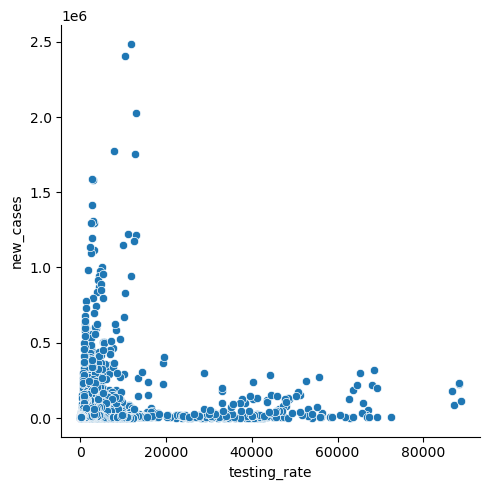

In [22]:
sns.relplot(x="testing_rate",y="new_cases",data=data)

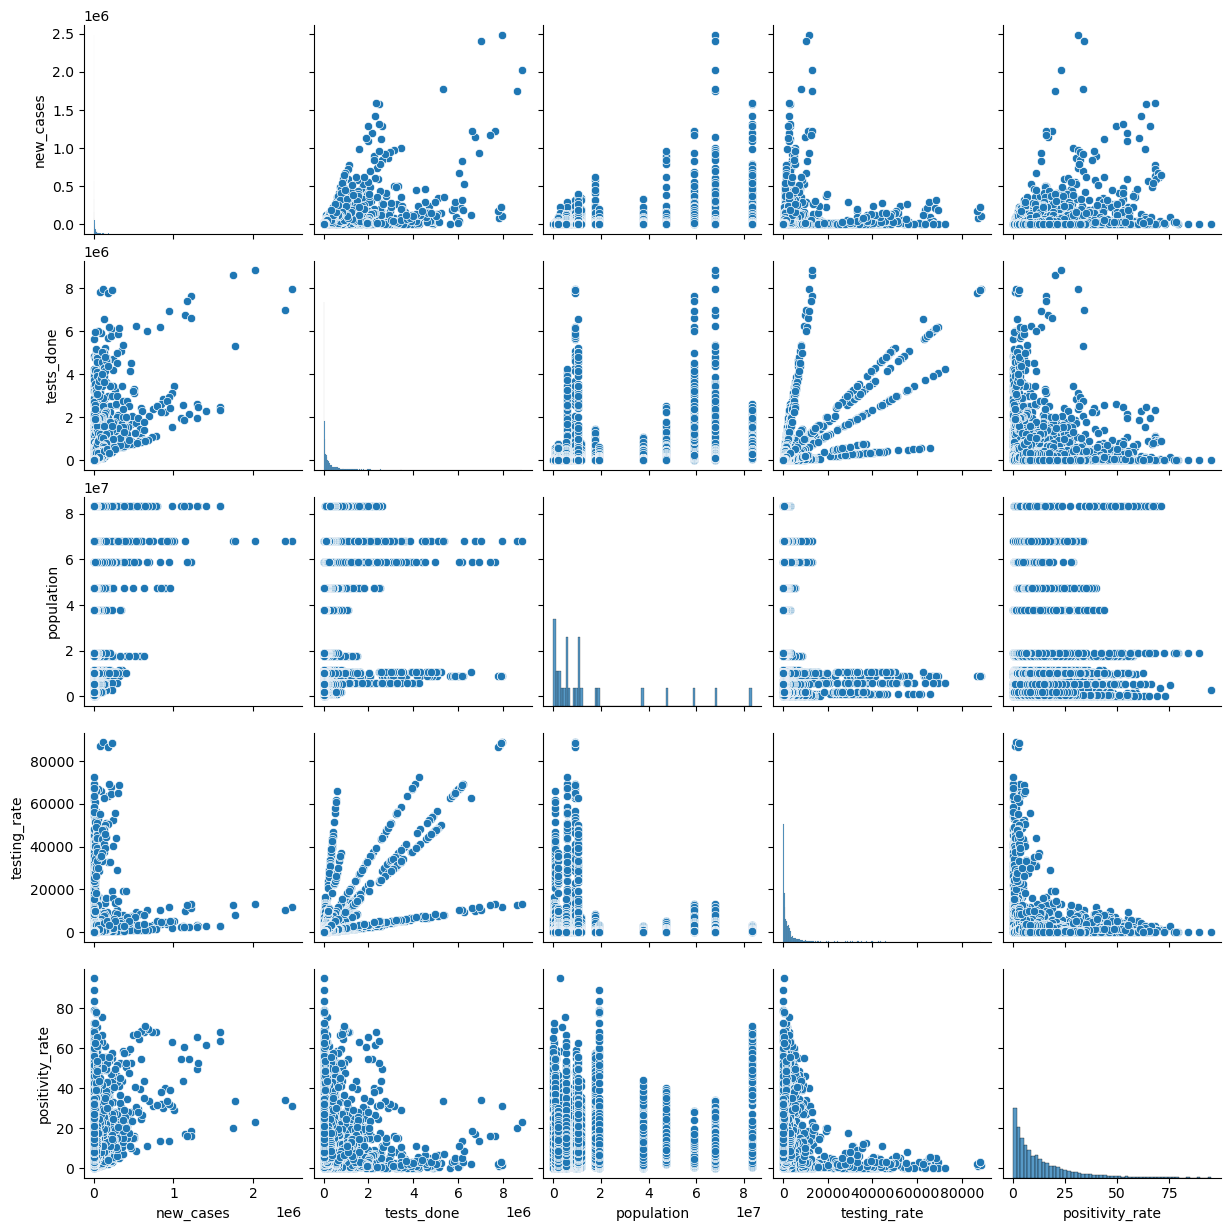

In [49]:
sns.pairplot(data)

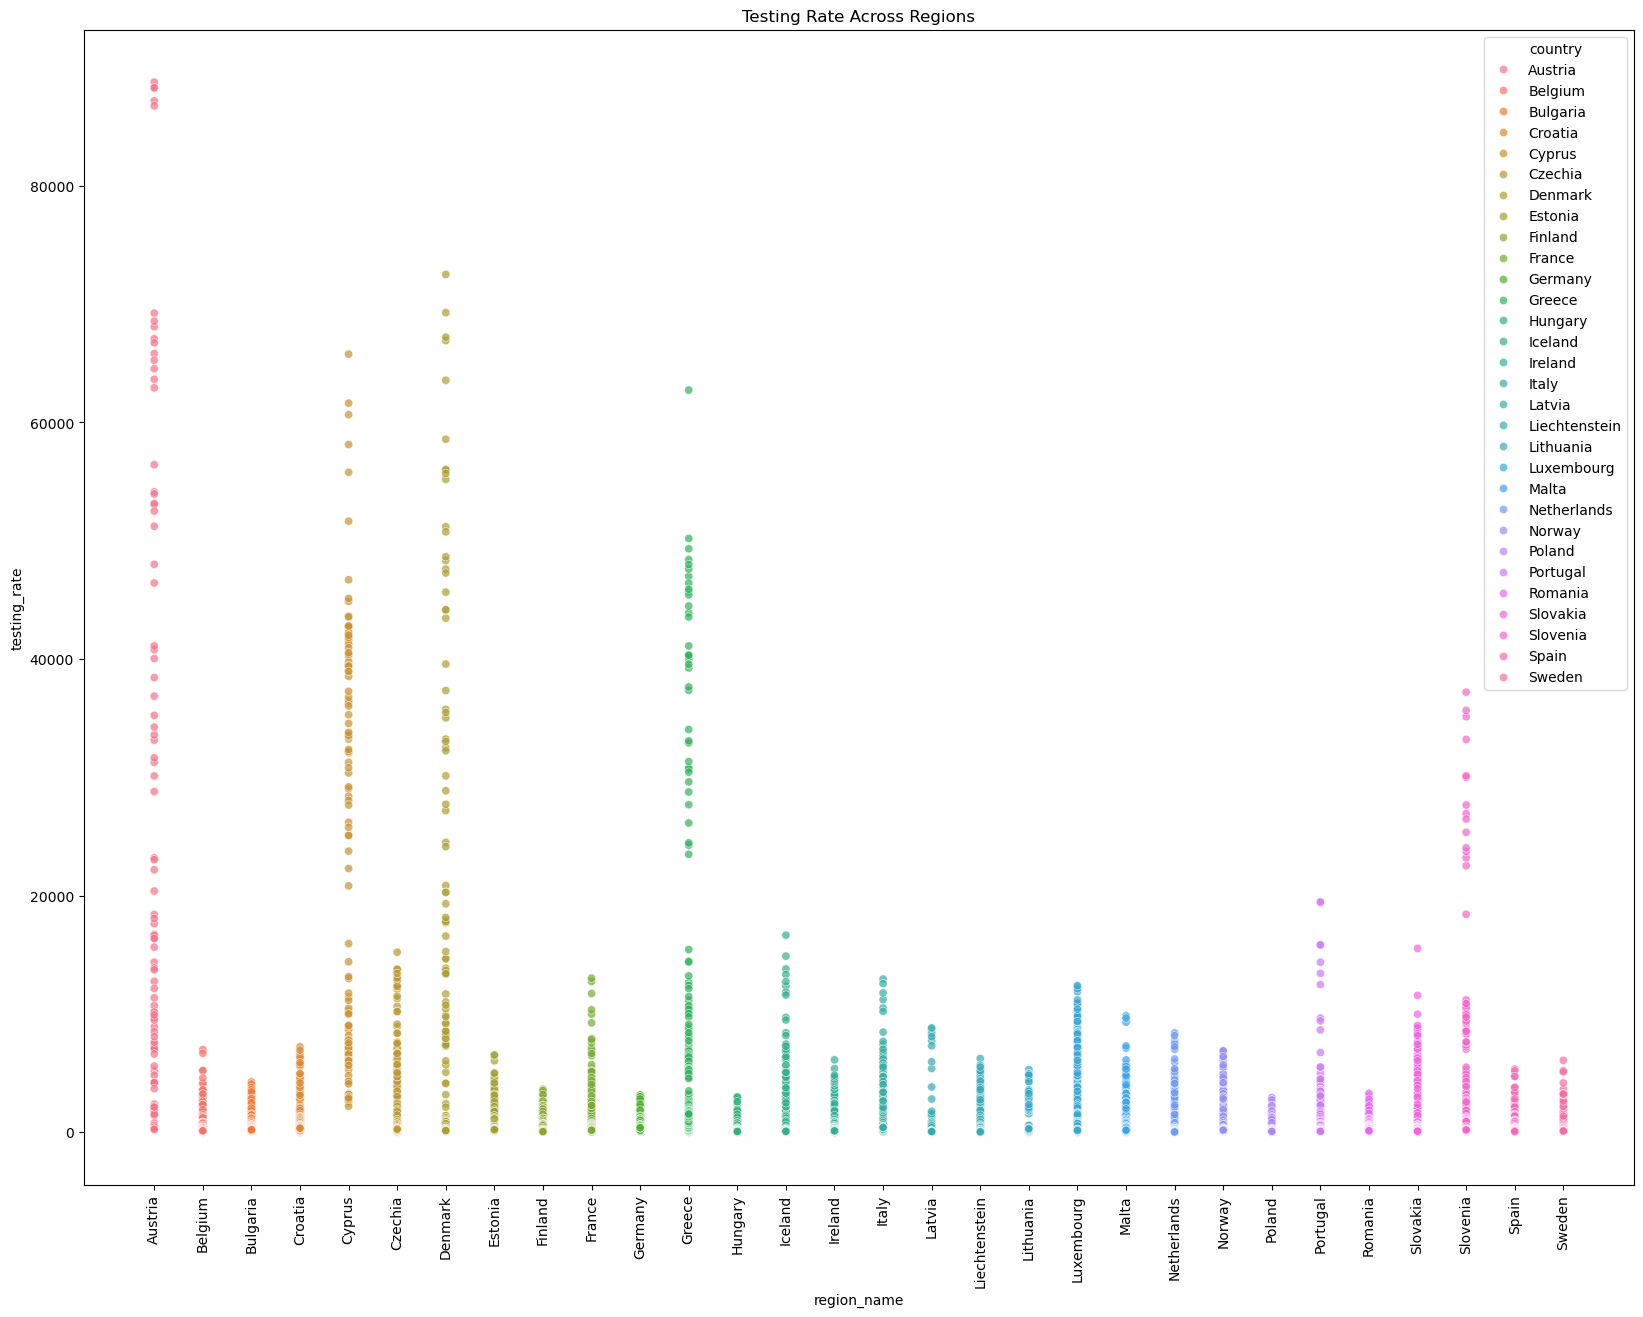

In [36]:
plt.figure(figsize=(20, 15))
sns.scatterplot(data=data, x="region_name", y="testing_rate", hue="country", alpha = 0.7)
plt.xticks(rotation=90)
plt.title("Testing Rate Across Regions")
plt.show()

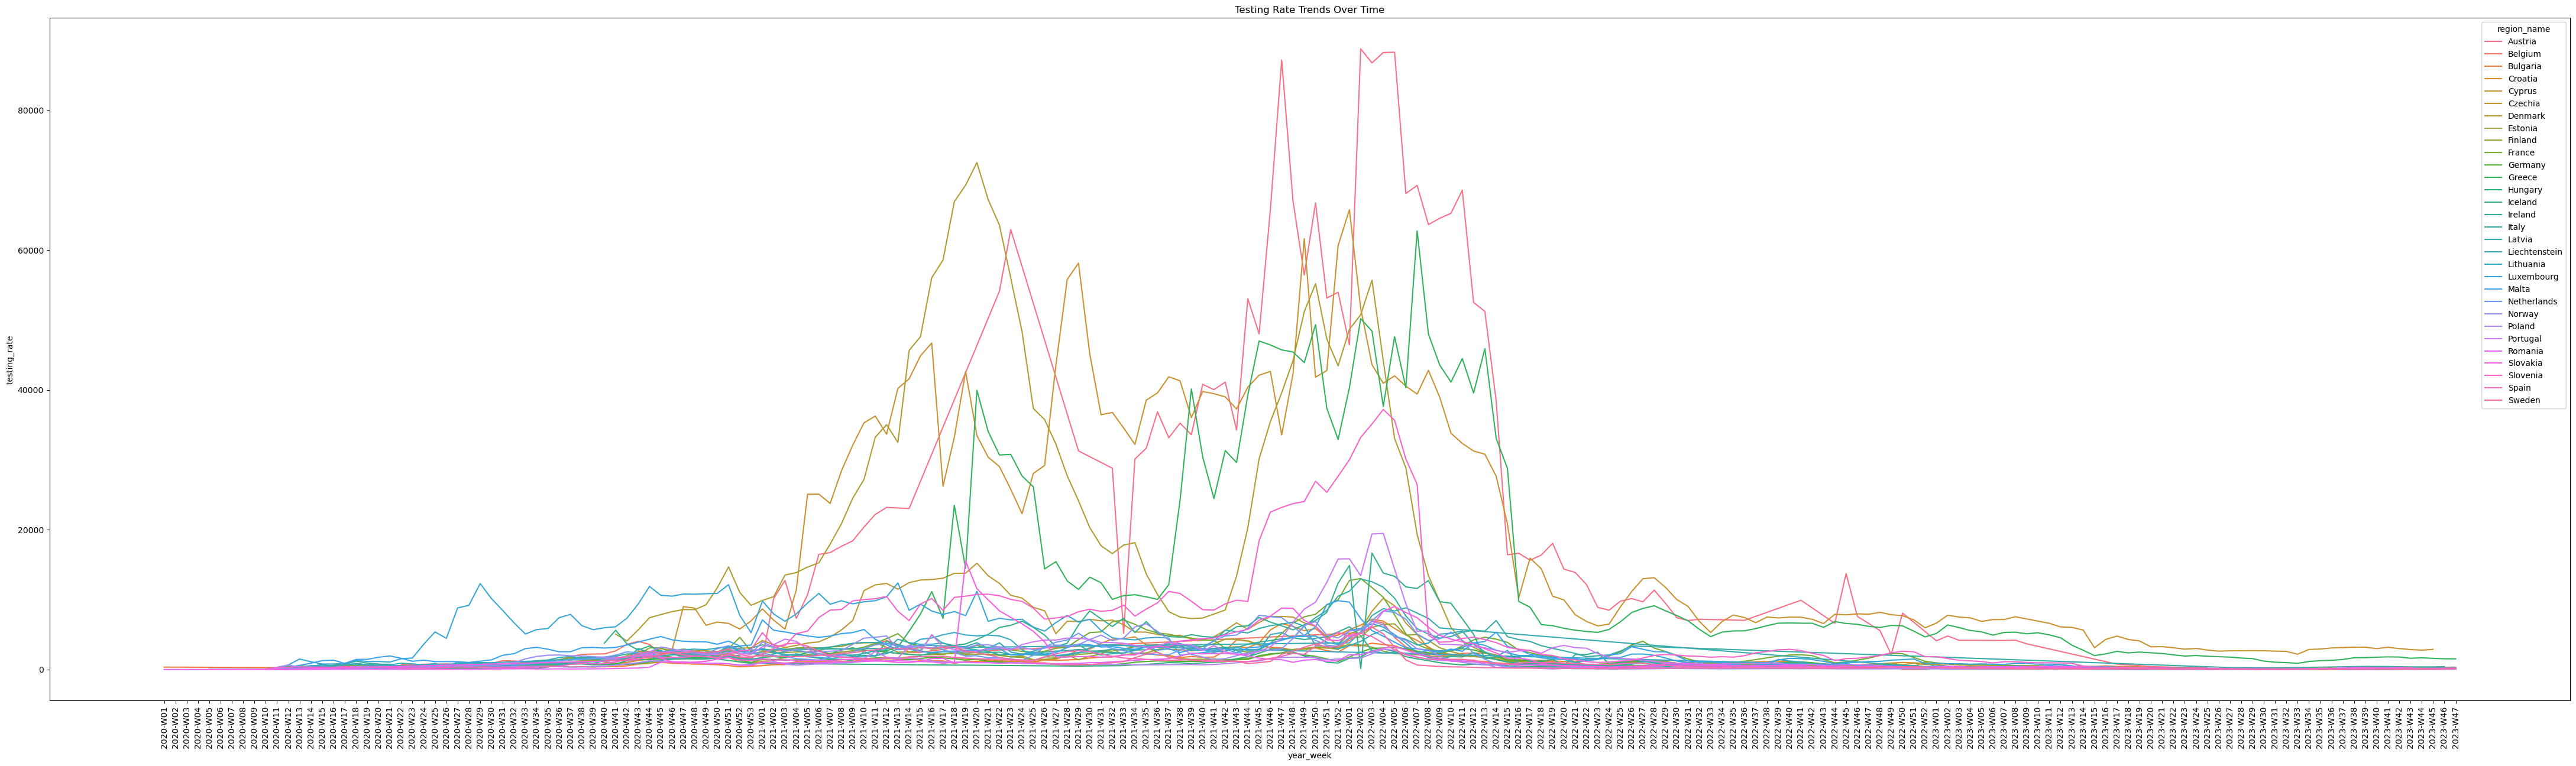

In [45]:
plt.figure(figsize=(55, 15))
sns.lineplot(x="year_week", y="testing_rate", hue="region_name", data=data)
plt.xticks(rotation=90)
plt.title("Testing Rate Trends Over Time")
plt.show()

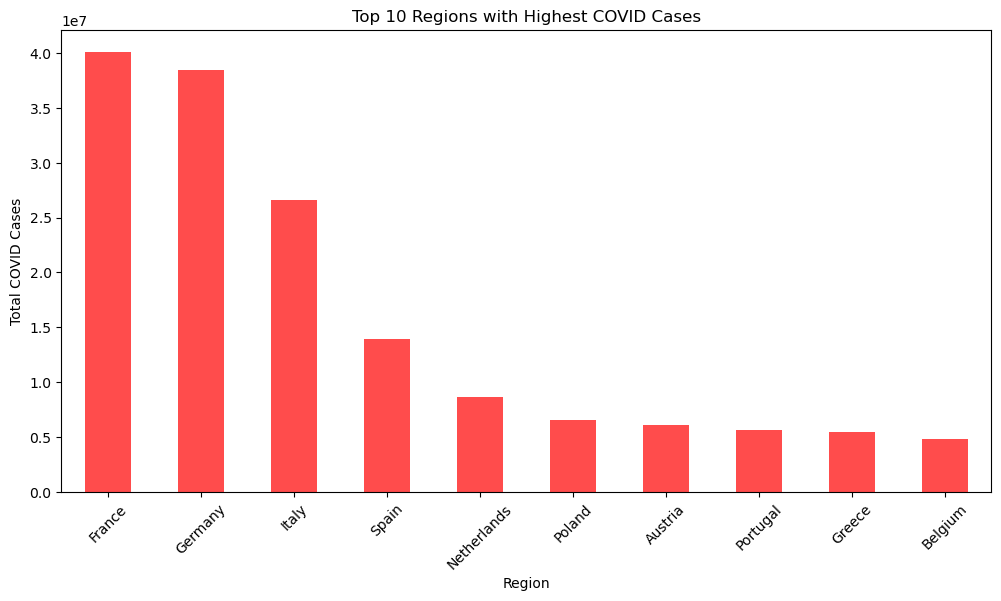

In [47]:
top_regions = data.groupby("region_name")["new_cases"].sum().nlargest(10)
plt.figure(figsize=(12, 6))
top_regions.plot(kind="bar", color="red", alpha=0.7)
plt.xlabel("Region")
plt.ylabel("Total COVID Cases")
plt.title("Top 10 Regions with Highest COVID Cases")
plt.xticks(rotation=45)
plt.show()


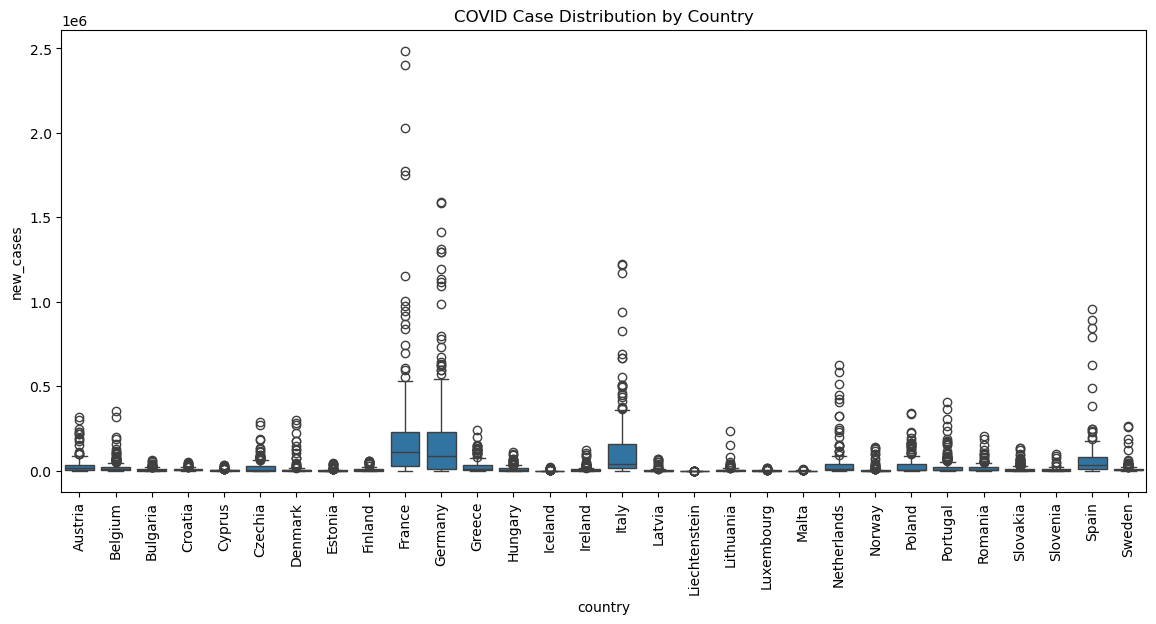

In [58]:
plt.figure(figsize=(14, 6))
sns.boxplot(x="country", y="new_cases", data=data)
plt.xticks(rotation=90)
plt.title("COVID Case Distribution by Country")
plt.show()

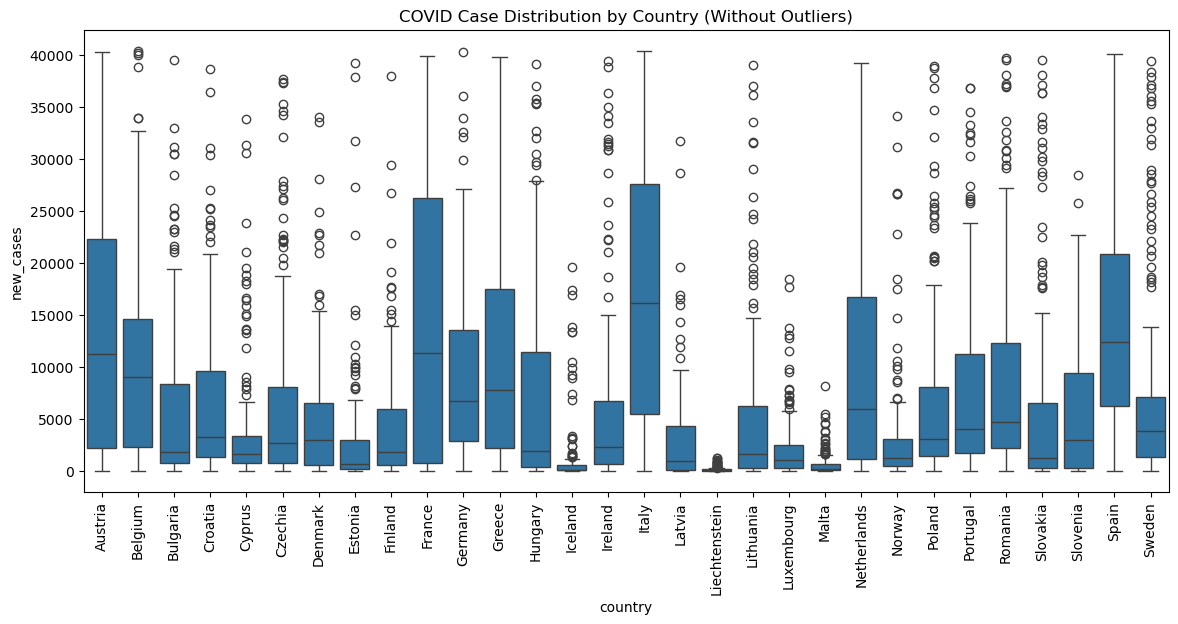

In [59]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

cleaned_data = remove_outliers(data, "new_cases")

plt.figure(figsize=(14, 6))
sns.boxplot(x="country", y="new_cases", data=cleaned_data)
plt.xticks(rotation=90)
plt.title("COVID Case Distribution by Country (Without Outliers)")
plt.show()

C:\Users\sruja\AppData\Local\Temp\ipykernel_27676\2162339473.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_regions.index, y=top_regions.values, palette="Reds")


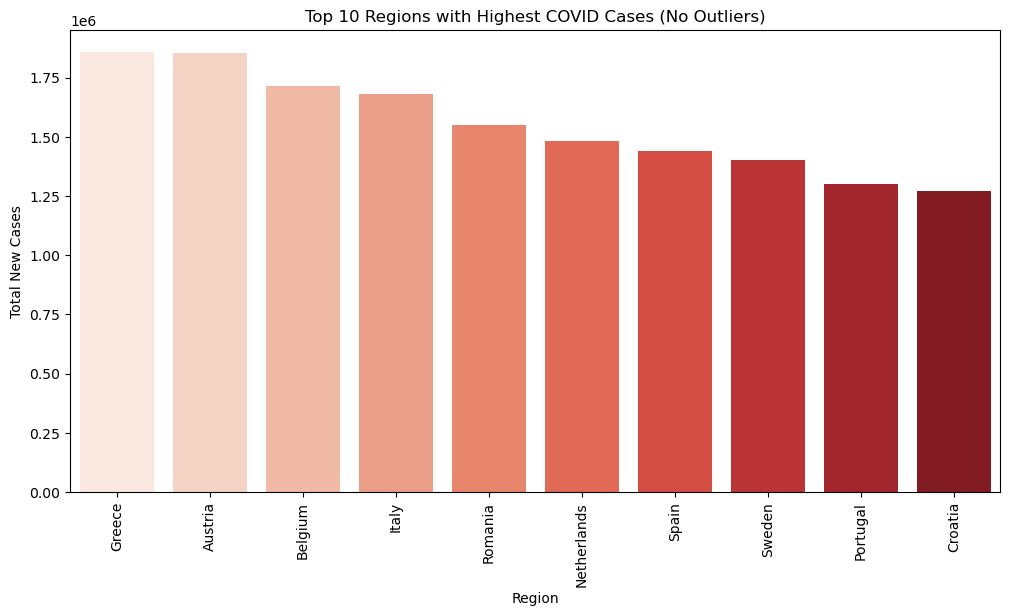

In [63]:
top_regions = cleaned_data.groupby("region_name")["new_cases"].sum().nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_regions.index, y=top_regions.values, palette="Reds")
plt.xticks(rotation=90)
plt.xlabel("Region")
plt.ylabel("Total New Cases")
plt.title("Top 10 Regions with Highest COVID Cases (No Outliers)")
plt.show()

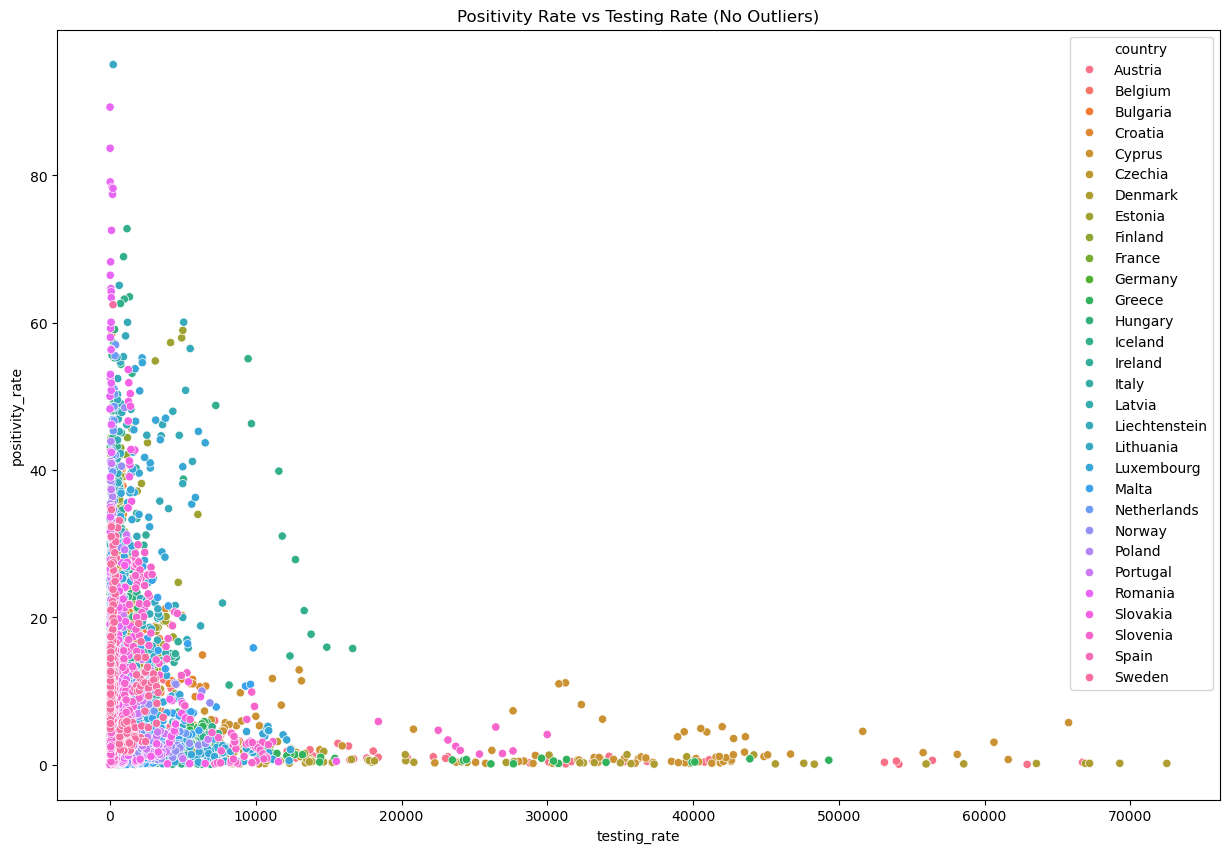

In [67]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x="testing_rate", y="positivity_rate", data=cleaned_data, hue="country")
plt.title("Positivity Rate vs Testing Rate (No Outliers)")
plt.show()